# 선형계획법 복습 

In [4]:
c = np.array([-3, -5])
A = np.array([[-1,0],[0,-1],[1,2],[4,5]])
b = np.array([-100,-100, 500, 9800])

# 선형계획법 명령
sp.optimize.linprog(c, A, b)

     con: array([], dtype=float64)
     fun: -1399.9999948073837
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([1.99999991e+02, 4.19920389e-06, 3.31137471e-07, 8.10000001e+03])
  status: 0
 success: True
       x: array([299.99999127, 100.0000042 ])

# CVXPY 는 선형계획법 문제를 심볼릭 연산으로 계산한다. 

In [25]:
import cvxpy as cp

# 최적화 해 찾을 변수 
x_1 = cp.Variable()
x_2 = cp.Variable()

# 부등식 제한조건 
f1 = -x_1 <= -100
f2 = -x_2 <= -100
f3 = x_1+2*x_2 <= 500
f4 = 4*x_1 +5*x_2 <= 9800

# 목적함수 지정 
obj = cp.Minimize(-3*x_1-5*x_2)

# 최적화 문제 정의 
prob = cp.Problem(obj, constraints=[f1, f2, f3, f4])

# 최적화 문제 계산 명령 
prob.solve()

print(prob.status)
print(x_1.value, x_2.value)
prob.solve()

optimal
299.99999911572195 100.00000058337798


-1400.0000002640559

In [38]:
# 테스트 
import cvxpy as cp

x_1 = cp.Variable()
x_2 = cp.Variable()

# 목적함수
obj = cp.Minimize((x_1-4)**2+(x_2-2)**2)

# 부등식 제한조건
constraints = [
    x_1+x_2-1 <=0,
    -x_1+x_2-1 <= 0,
    -x_1-x_2-1 <= 0,
    x_1-x_2-1 <= 0
]

# 최적화 문제 정의 
prob = cp.Problem(obj, constraints=constraints)
prob.solve()

print(f'상태 : {prob.status}')
print(f'최적해 : {x_1.value, x_2.value}')

# 되네. 

상태 : optimal
최적해 : (array(1.), array(-1.11022189e-22))


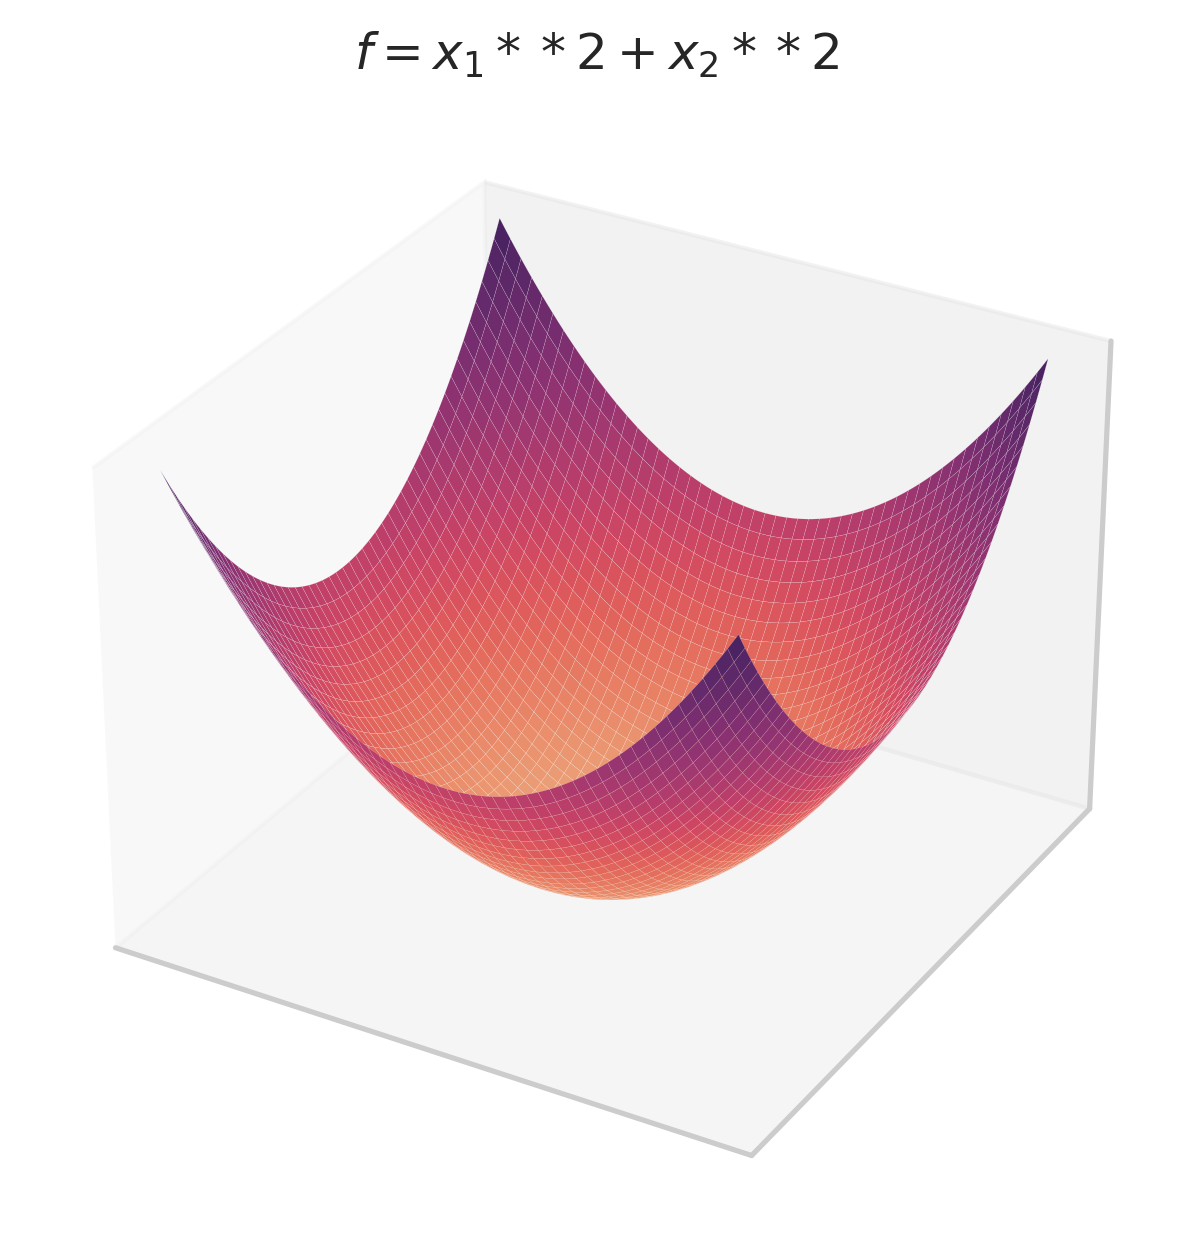

In [35]:
def f(x, y) : 
    return x**2+y**2

xx = np.linspace(-10,10,400)
yy = np.linspace(-10,10,500)

X,Y = np.meshgrid(xx,yy)
Z = f(X,Y)

ax = plt.gca(projection='3d')
ax.plot_surface(X,Y,Z, linewidth=0.03, cmap='flare')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.title('$f = x_{1}**2+x_{2}**2$')
plt.show()

In [47]:
import cvxpy as cp

a = cp.Variable()
b = cp.Variable()

# 목적함수 
obj2 = cp.Minimize(a+b)

# 제한조건 
const = a**2+b**2 == 1

# 최적화문제 정의 
prob = cp.Problem(obj2, constraints=[const])
prob.solve()

DCPError: Problem does not follow DCP rules. Specifically:
The following constraints are not DCP:
power(var384, 2.0) + power(var385, 2.0) == 1.0 , because the following subexpressions are not:
|--  power(var384, 2.0) + power(var385, 2.0) == 1.0

In [49]:
def f(x) : 
    return -np.log(x[0])-np.log(x[1])
def p(x) : 
    return x[0]+x[1]-1

sp.optimize.fmin_slsqp(f, np.array([1,1]), eqcons=[p])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.3862943611198901
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


array([0.5, 0.5])

In [106]:
from cvxopt import matrix, solvers

Q = matrix(np.array([[2.0,0.0],[0.0,2.0]]))
c = matrix(np.array([0.0,0.0]))
A = matrix(np.array([[1.0,1.0]]))
b = matrix(np.array([1.0]))

sol = solvers.qp(Q, c, A=A, b=b)
np.array(sol['x'])

array([[0.5],
       [0.5]])

In [174]:
def h1(x) : 
    return x[0]+x[1]+(np.sqrt(2)/2)*(x[0]**2+x[1]**2-1)

sp.optimize.minimize(h2, np.array([0,0]))

      fun: -757820.3788412411
 hess_inv: array([[ 0.14644736, -0.85355264],
       [-0.85355264,  0.14644736]])
      jac: array([1035.2421875, 1035.2421875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 348
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([-731.31811737, -731.31811737])

In [185]:
# 컨벡스 최적화 1
import cvxpy as cp

x = cp.Variable()
y = cp.Variable()

# 목적함수 
h = cp.Minimize(x+y+(np.sqrt(2)/2)*(x**2+y**2-1))

# 최적화 문제 정의
prob = cp.Problem(h)
prob.solve()
x.value, y.value

(array(-0.70710678), array(-0.70710678))

In [186]:
# 컨벡스 최적화 2
import cvxpy as cp

x = cp.Variable()
y = cp.Variable()

# 목적함수 
h = cp.Maximize(x+y-(np.sqrt(2)/2)*(x**2+y**2-1))

# 최적화 문제 정의
prob = cp.Problem(h)
prob.solve()
x.value, y.value

(array(0.70710678), array(0.70710678))

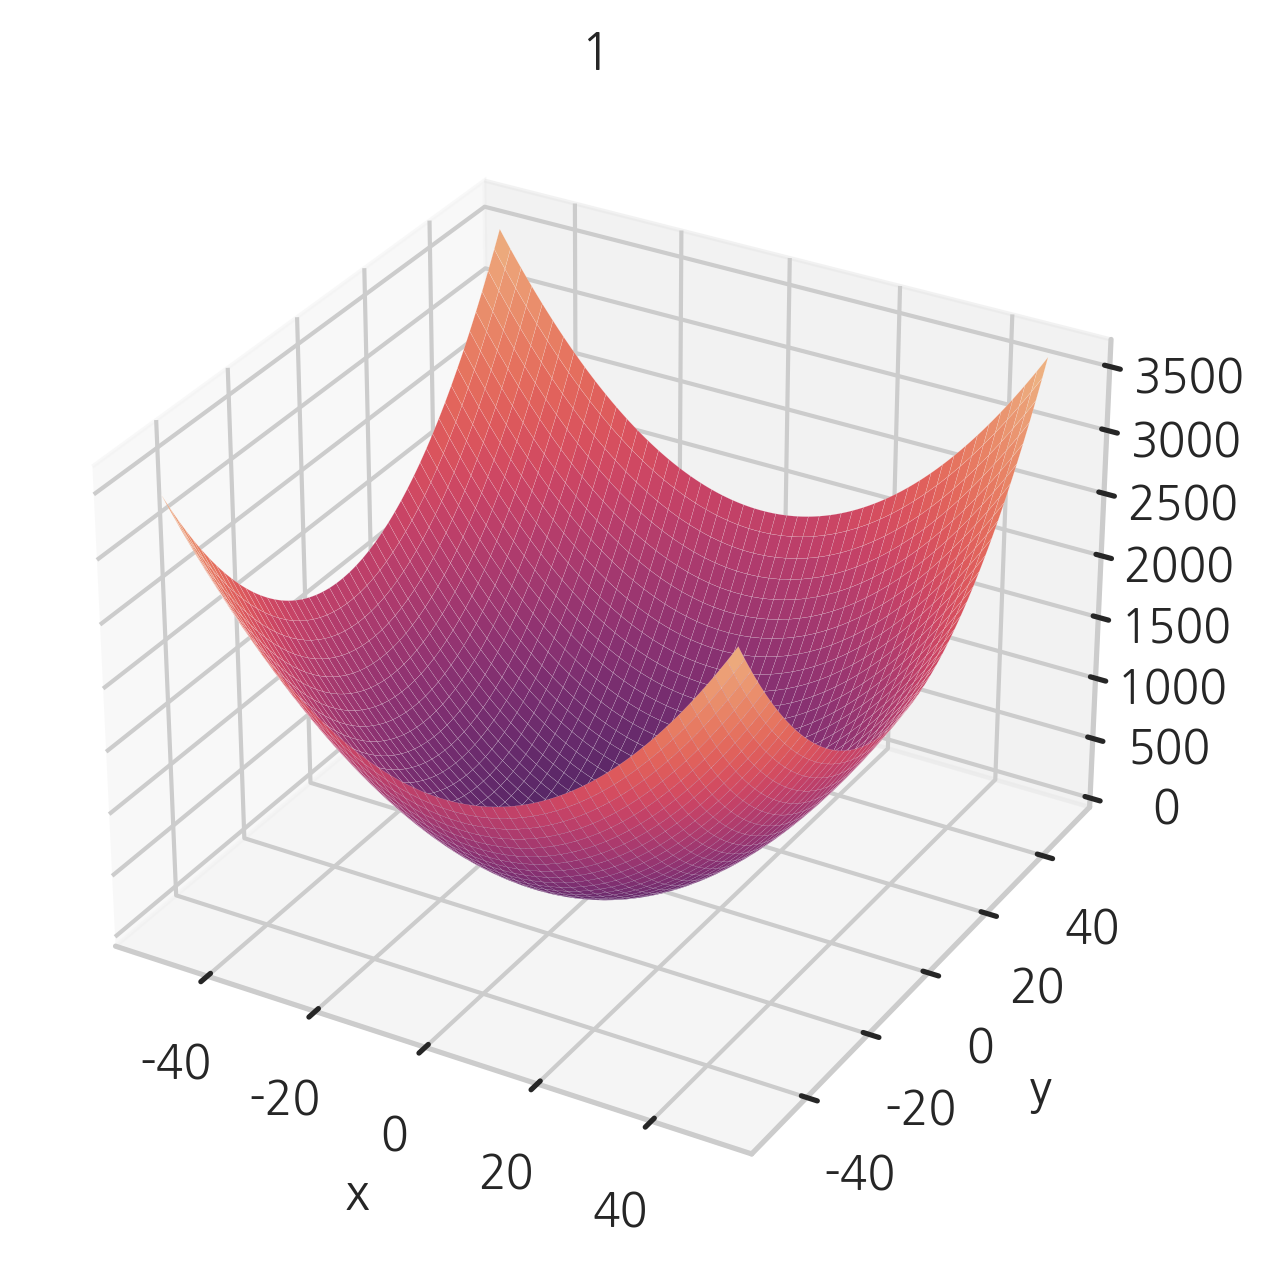

In [189]:
xx = np.linspace(-50,50,500)
yy = np.linspace(-50,50,500)

X,Y = np.meshgrid(xx,yy)

def h1(x, y) : 
    return x+y+(np.sqrt(2)/2)*(x**2+y**2-1)
Z1 = h1(X,Y)

def h2(x,y) : 
    return x+y-(np.sqrt(2)/2)*(x**2+y**2-1)
Z2 = h2(X,Y)

ax = plt.gca(projection='3d')
ax.plot_surface(X,Y,Z1, linewidth=0.03, cmap='flare_r')
plt.title('1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

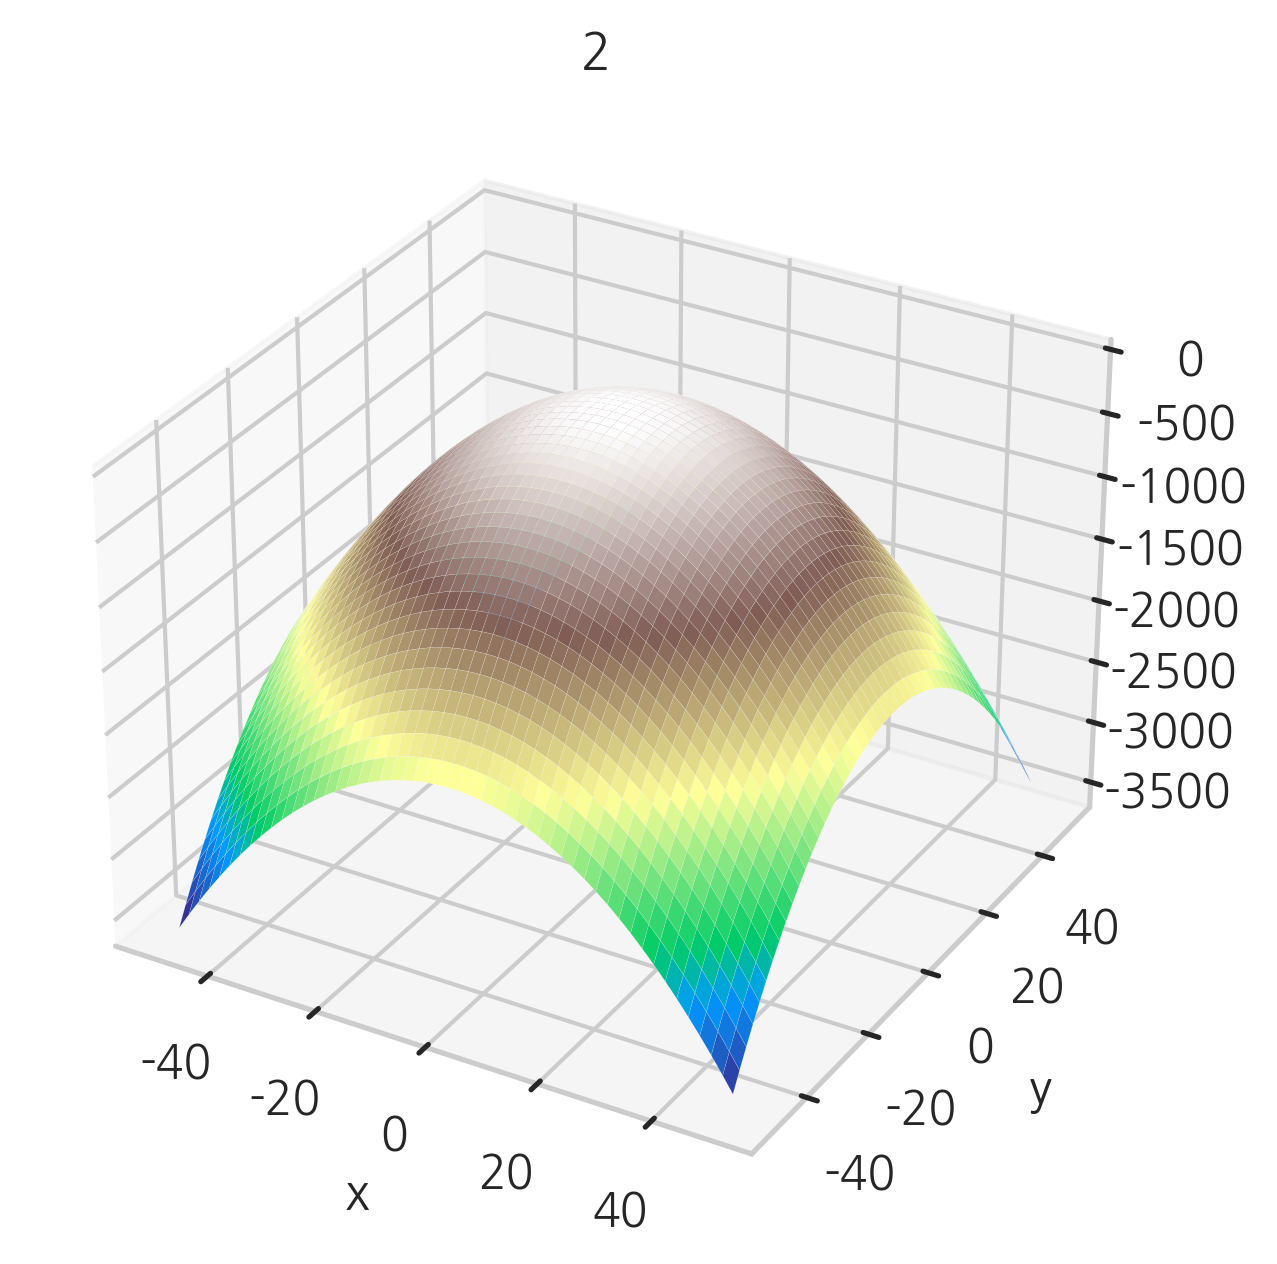

In [190]:
ax = plt.gca(projection='3d')
ax.plot_surface(X,Y,Z2, linewidth=0.03, cmap='terrain')
plt.title('2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [291]:
import cvxpy as cp

x = cp.Variable()
y = cp.Variable()

# 목적함수 
obj = cp.Minimize(x+y)
print(obj.is_dcp())

# 제한조건 
constraints = [
    x**2+y**2 == 1
]

# 최적화 문제 정의 
prob = cp.Problem(obj, constraints=constraints)
print(prob.is_dcp()) # 제한조건에 따라 목적함수 최소화할 수 없다. (컨벡스 최적화 불가능)

True
False


In [348]:
# 컨벡스 최적화 테스트 2

import cvxpy as cp

x = cp.Variable()
y = cp.Variable()

f = (x-2)**2+2 # convax 함수인지, concave 함수인지 자동으로 인식한다. 
print(f.curvature)

# 목적함수 
obj = cp.Minimize(f)
print(obj.is_dcp())

# 최적화 문제의 정의 
prob = cp.Problem(obj)
print(prob.is_dcp())

print(prob.solve())

print(x.value)

CONVEX
True
True
2.0
2.0


In [379]:
# 컨벡스 최적화 테스트 3

x = cp.Variable()
y = cp.Variable()

f = x**2+y**2
print(f.curvature)

obj = cp.Minimize(f)

constraints = [x+y-1==0]

prob = cp.Problem(obj, constraints=constraints)
print(prob.is_dcp()) # 목적함수, 제약조건 종합 고려해서. 목적함수 최소화가 가능한가. 

print(prob.solve());print(x.value, y.value)


CONVEX
True
0.5000000000000002
0.5000000000000001 0.5000000000000001


In [386]:
# 컨벡스 최적화 테스트 4

x = cp.Variable()
y = cp.Variable()

obj = cp.Minimize(x**2+y**2)

constraints = [
    x+y-1 <= 0
]

prob = cp.Problem(obj, constraints)
print(prob.is_dcp())

print(prob.solve(), x.value, y.value)

True
0.0 0.0 0.0


In [387]:
# 컨벡스 최적화 테스트 5

x = cp.Variable()
y = cp.Variable()

obj = cp.Minimize(x**2+y**2)

constraints = [
    -x-y+1 <= 0
]

prob = cp.Problem(obj, constraints)
print(prob.is_dcp())

print(prob.solve(), x.value, y.value)

True
0.5000000000000002 0.5000000000000001 0.5000000000000001


In [396]:
# 컨벡스 최적화 테스트 6

x = cp.Variable()
y = cp.Variable()

obj = cp.Minimize((x-4)**2+(y-2)**2)
print(obj.is_dcp())

constraints = [
    x+y-1 <= 0 ,
    -x+y-1 <= 0 ,
    -x-y-1 <= 0 ,
    x-y-1 <= 0 
]

prob = cp.Problem(obj, constraints = constraints)
print(prob.is_dcp())

prob.solve(), x.value, y.value

True
True


(13.0, array(1.), array(-1.11022189e-22))

# 컨벡스 함수지만, dcp rule 만족하지 않는 것들도 있다

Text(0.5, 0.92, '컨벡스 함수지만 DCP rule 만족하지 않는 것들도 있다')

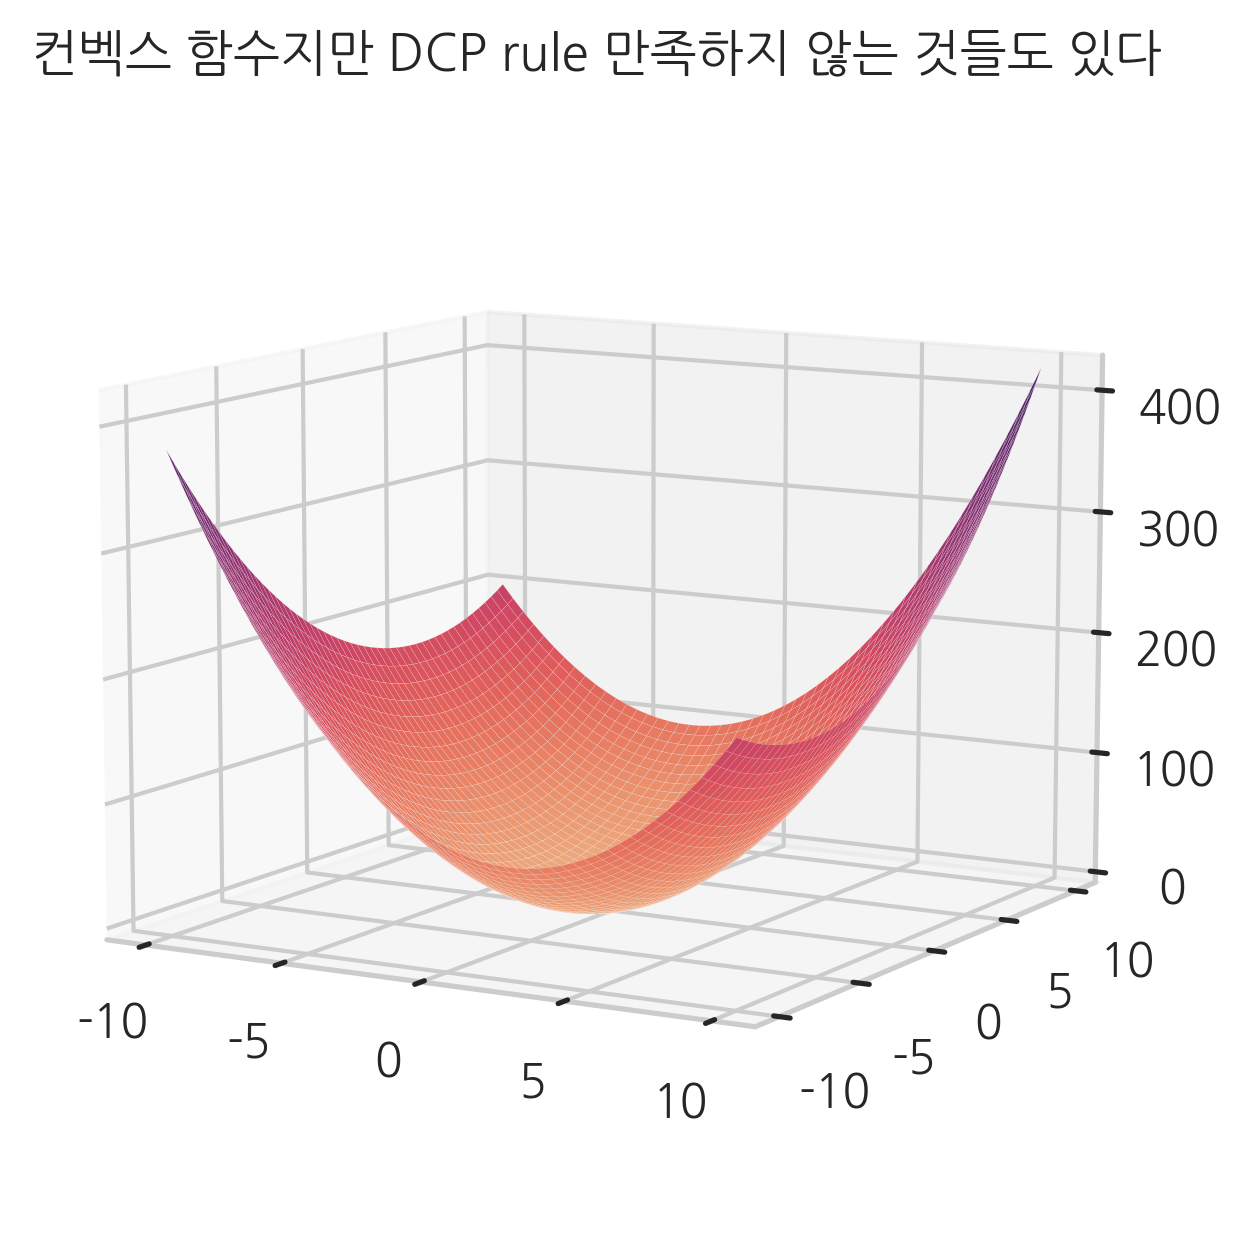

In [127]:
Q = matrix(np.array([[4.0,1.0],[1.0,2.0]]))
c = matrix(np.array([1.0,1.0]))
A = matrix(np.array([[1.0,1.0]]))
b = matrix(np.array([1.0]))

def f(x,y) :
    return 2*x**2+y**2+x*y+x+y 
Z = f(X,Y)
ax = plt.gca(projection='3d')
ax.plot_surface(X,Y,Z, linewidth=0.03, cmap='flare')
ax.view_init(10, -60)
plt.title('컨벡스 함수지만 DCP rule 만족하지 않는 것들도 있다')


In [407]:
# cvxopt로 선형계획법 풀기 
c = matrix(np.array([-3.0,-5.0]))
A = matrix(np.array([[-1.0,0.0],[0.0,-1.0],[1.0,2.0],[4.0,5.0]]))
b = matrix(np.array([-100.0, -100.0, 500.0, 9800.0]))

np.array(solvers.lp(c, A, b)['x'])

     pcost       dcost       gap    pres   dres   k/t
 0: -7.2571e+03 -2.1686e+04  2e+04  4e-01  2e+00  1e+00
 1: -3.8325e+03 -8.3677e+03  8e+03  1e-01  6e-01  1e+02
 2: -1.6152e+03 -2.0237e+03  1e+03  1e-02  6e-02  7e+01
 3: -1.4108e+03 -1.4354e+03  4e+01  1e-03  5e-03  2e+01
 4: -1.4001e+03 -1.4004e+03  4e-01  1e-05  5e-05  2e-01
 5: -1.4000e+03 -1.4000e+03  4e-03  1e-07  5e-07  2e-03
 6: -1.4000e+03 -1.4000e+03  4e-05  1e-09  5e-09  2e-05
Optimal solution found.


array([[300.00000127],
       [100.0000013 ]])

In [414]:
# 이차계획법 문제 
from cvxopt import matrix, solvers

Q = matrix(np.array([[2.0,0.0],[0.0,2.0]]))
c = matrix(np.array([0.0,0.0]))
A = matrix(np.array([[1.0,1.0]]))
b = matrix(np.array([1.0]))

r = solvers.qp(Q,c,A=A,b=b)['x']
np.array(r)

array([[0.5],
       [0.5]])

# 하나의 함수에 여러가지 최적화 방법. 알고리듬을 쓸 수 있다. 


In [418]:
# 하나의 함수에 여러가지 최적화 방법. 알고리듬을 쓸 수 있다. 

# 1. sp.optimize.minimze()
def pf(x) : 
    return x[0]**2+x[1]**2-(x[0]+x[1]-1)

sp.optimize.minimize(pf, np.array([0,3]))

      fun: 0.5000000000000009
 hess_inv: array([[0.98076923, 0.09615384],
       [0.09615384, 0.51923077]])
      jac: array([7.45058060e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.50000003, 0.50000001])

In [419]:
# 2. 제한조건 최적화 
def pf(x) : 
    return x[0]**2+x[1]**2

def con(x) : 
    return x[0]+x[1]-1

sp.optimize.fmin_slsqp(pf, np.array([1,2]), eqcons=[con])

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5000000000000001
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


array([0.5, 0.5])

In [427]:
# x**2+y**2 는 볼록함수다. 
# 3. cvxpy 를 이용한 컨벡스 최적화 

import cvxpy as cp

x = cp.Variable()
y = cp.Variable()

# 목적함수 
obj = cp.Minimize(x**2+y**2)
# 목적함수가 컨벡스 최적화 가능한가? (목적함수가 볼록함수인가, 오목함수인가?)
print(obj.is_dcp())
# 볼록함수다. 

# 제한조건 
cons = [x+y-1 == 0]

# 최적화 문제 정의 
prob = cp.Problem(obj, constraints=cons)

# 제한조건 감안했을 때, 볼록함수 최적화가 가능한가?
print(prob.is_dcp()) # 가능하다. 

prob.solve(), x.value, y.value


True
True


(0.5000000000000002, array(0.5), array(0.5))

In [433]:
# x**2+y**2 는 일반화된 이차형식으로 바꿀 수 있다. 
# 4. cvxopt를 이용해 이차계획법으로 풀기 

from cvxopt import matrix, solvers

Q = matrix(np.array([[2.0,0.0],[0.0,2.0]]))
c = matrix(np.array([0.0,0.0]))
A = matrix(np.array([[1.0,1.0]]))
b = matrix(np.array([1.0]))

np.array(solvers.qp(Q, c, A=A, b=b)['x'])

array([[0.5],
       [0.5]])